# EDA YELP + MAPS
##### EXPLORATORY DATA ANALYSIS OF INFORMATION PROVIDED BY THE YELP SITE AND GOOGLE MAPS

### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import builtin.utils as ut

import warnings
warnings.filterwarnings("ignore")

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 3, Finished, Available)

In [2]:
pip install fastparquet

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 4, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 54.4 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


### LOAD CLEAN DATA

In [3]:
yp = pd.read_parquet('/lakehouse/default/Files/df_database/files_to_EDA/Yelp_to_EDA.parquet')
mp = pd.read_parquet('/lakehouse/default/Files/df_database/files_to_EDA/Maps_to_EDA.parquet',engine='fastparquet')


StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 5, Finished, Available)

##### As we are interested in a unified analysis of all the information, we carry out a concatenation of the information provided by both sites.

In [4]:
df = pd.concat([yp, mp]).reset_index(drop = True)

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 6, Finished, Available)

In [5]:
df.head(2)

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 7, Finished, Available)

,Business_Name,Address,City,State,Latitude,Longitude,Ranking,Review_Count,Date,Checkin_Count,User_Id,Stars,Text,User_Name,Category
0,Vietnamese Food Truck,,Tampa Bay,Florida,27.955269,-82.456320,4.0,10,2019-04-04 16:03:00,4,nnu9h6du4E6oqMasPgKR3Q,5,I eat pho about 4 times a week and from a spec...,Dana,"[Vietnamese, Food, Restaurants, Food Trucks]"
1,Thai 5 Fast Food,3424 S Dale Mabry Hwy,Tampa,Florida,27.912060,-82.505768,4.0,336,2018-02-04 18:25:53,495,nnu9h6du4E6oqMasPgKR3Q,1,Had gotten the Pad see eew in the past and did...,Dana,"[Laotian, American (Traditional), Asian Fusion..."


In [6]:
df_business = df[["Business_Name", 'Latitude', 'Longitude']]
df_business = df_business.drop_duplicates()
df_business = df_business.reset_index(drop = True)
df_business["Business_Id"] = df_business.index + 1
order = ['Business_Id', 'Business_Name', 'Latitude', 'Longitude']
df_business = df_business[order]
df_business.head(2)

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 8, Finished, Available)

,Business_Id,Business_Name,Latitude,Longitude
0,1,Vietnamese Food Truck,27.955269,-82.456320
1,2,Thai 5 Fast Food,27.912060,-82.505768


In [7]:
df = pd.merge(df, df_business, on=["Business_Name", 'Latitude', 'Longitude'], how= "left")
df = df[["Business_Id", "Business_Name", "Address", "City", "State", "Latitude", "Longitude", "Ranking", "Review_Count", "Date", "Checkin_Count", "User_Id", "Stars", "Text", "User_Name", "Category"]]

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 9, Finished, Available)

We look at the data summary

In [8]:
ut.data_summ(df)

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 10, Finished, Available)

       Column                                                           Data_type  No_miss_Qty  %Missing  Missing_Qty
  Business_Id                                                     [<class 'int'>]      6588286       0.0            0
Business_Name                                                     [<class 'str'>]      6588286       0.0            0
      Address                                                     [<class 'str'>]      6588286       0.0            0
         City                                                     [<class 'str'>]      6588286       0.0            0
        State                                                     [<class 'str'>]      6588286       0.0            0
     Latitude                                                   [<class 'float'>]      6588286       0.0            0
    Longitude                                                   [<class 'float'>]      6588286       0.0            0
      Ranking                                           

,Column,Data_type,No_miss_Qty,%Missing,Missing_Qty
0,Business_Id,[<class 'int'>],6588286,0.0,0
1,Business_Name,[<class 'str'>],6588286,0.0,0
2,Address,[<class 'str'>],6588286,0.0,0
3,City,[<class 'str'>],6588286,0.0,0
4,State,[<class 'str'>],6588286,0.0,0
5,Latitude,[<class 'float'>],6588286,0.0,0
6,Longitude,[<class 'float'>],6588286,0.0,0
7,Ranking,[<class 'float'>],6588286,0.0,0
8,Review_Count,[<class 'int'>],6588286,0.0,0
9,Date,[<class 'pandas._libs.tslibs.timestamps.Timest...,6588286,0.0,0


##### As the evaluation by business is of our interest, we initially proceed to determine the number of businesses for which information is provided.

In [9]:
total_business = len(df["Business_Name"].unique())
print(f"Total business: {total_business}")

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 11, Finished, Available)

Total business: 50523


## TREATMENT OF CATEGORICAL VARIABLES

In [10]:
df_explode = ut.explode_column(df, "Category")
df_explode

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 12, Finished, Available)

,Business_Id,Business_Name,Address,City,State,Latitude,Longitude,Ranking,Review_Count,Date,Checkin_Count,User_Id,Stars,Text,User_Name,Category
0,1,Vietnamese Food Truck,,Tampa Bay,Florida,27.955269,-82.456320,4.0,10,2019-04-04 16:03:00,4,nnu9h6du4E6oqMasPgKR3Q,5,I eat pho about 4 times a week and from a spec...,Dana,Vietnamese
0,1,Vietnamese Food Truck,,Tampa Bay,Florida,27.955269,-82.456320,4.0,10,2019-04-04 16:03:00,4,nnu9h6du4E6oqMasPgKR3Q,5,I eat pho about 4 times a week and from a spec...,Dana,Food
0,1,Vietnamese Food Truck,,Tampa Bay,Florida,27.955269,-82.456320,4.0,10,2019-04-04 16:03:00,4,nnu9h6du4E6oqMasPgKR3Q,5,I eat pho about 4 times a week and from a spec...,Dana,Restaurants
0,1,Vietnamese Food Truck,,Tampa Bay,Florida,27.955269,-82.456320,4.0,10,2019-04-04 16:03:00,4,nnu9h6du4E6oqMasPgKR3Q,5,I eat pho about 4 times a week and from a spec...,Dana,Food Trucks
1,2,Thai 5 Fast Food,3424 S Dale Mabry Hwy,Tampa,Florida,27.912060,-82.505768,4.0,336,2018-02-04 18:25:53,495,nnu9h6du4E6oqMasPgKR3Q,1,Had gotten the Pad see eew in the past and did...,Dana,Laotian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6588281,68401,The Green Room Of Libertyville,"The Green Room Of Libertyville, 624 Milwaukee ...",Libertyville,Illinois,42.289450,-87.954386,4.6,228,2019-01-13 04:40:40,1,117427464841505505280.0,3,ND,Max Eggers,Restaurant
6588282,68401,The Green Room Of Libertyville,"The Green Room Of Libertyville, 624 Milwaukee ...",Libertyville,Illinois,42.289450,-87.954386,4.6,228,2019-10-20 04:31:09,1,107747075795290669056.0,5,ND,Brian Lawton,Restaurant
6588283,68401,The Green Room Of Libertyville,"The Green Room Of Libertyville, 624 Milwaukee ...",Libertyville,Illinois,42.289450,-87.954386,4.6,228,2017-10-18 13:47:06,1,111433309018237845504.0,4,ND,Christopher Cantagallo,Restaurant
6588284,68401,The Green Room Of Libertyville,"The Green Room Of Libertyville, 624 Milwaukee ...",Libertyville,Illinois,42.289450,-87.954386,4.6,228,2019-01-09 11:38:23,1,110361572886252994560.0,5,ND,Saira S,Restaurant


- ### Analysis by category

##### In a first analysis, we are going to check the number of existing businesses according to their category.

In [11]:
#pd.set_option('display.max_rows', None)

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 13, Finished, Available)

In [12]:
# We recategorize the categories proposed by the sites, in order to unify the information.
df_explode["Category"] = df_explode["Category"].str.replace(r'.*restaurant.*', 'Restaurant', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Restaurants.*', 'Restaurant', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Restaurant.*', 'Restaurant', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Pubs.*', 'Pub', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*pub.*', 'Pub', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Pub.*', 'Pub', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Hotels.*', 'Hotel', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*hotel.*', 'Hotel', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Hotel.*', 'Hotel', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Museum.*', 'Museum', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*museum.*', 'Museum', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*museum.*', 'Museum', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*agency.*', 'Agency and rental', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Rental.*', 'Agency and rental', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*rental.*', 'Agency and rental', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*park.*', 'Park', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Parks.*', 'Park', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Park.*', 'Park', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Zoos.*', 'Zoo', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Hostels.*', 'Hostel', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*hostel.*', 'Hostel', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*mall.*', 'Shopping mall', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*gallery.*', 'Art gallery', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Forestry.*', 'National forest', regex=True)


StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 14, Finished, Available)

In [13]:
# List of permitted categories
allowed_categories = ['Restaurant', 'Pub', 'Hotel', 'Museum', 'Agency and rental', 
                      'Park', 'Zoo', 'Hostel', 'Shopping mall', 'Art gallery', 'National forest']

# Filter the DataFrame to only contain records with the allowed categories
df_explode = df_explode[df_explode['Category'].isin(allowed_categories)]

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 15, Finished, Available)

In [14]:
df_explode

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 16, Finished, Available)

,Business_Id,Business_Name,Address,City,State,Latitude,Longitude,Ranking,Review_Count,Date,Checkin_Count,User_Id,Stars,Text,User_Name,Category
0,1,Vietnamese Food Truck,,Tampa Bay,Florida,27.955269,-82.456320,4.0,10,2019-04-04 16:03:00,4,nnu9h6du4E6oqMasPgKR3Q,5,I eat pho about 4 times a week and from a spec...,Dana,Restaurant
1,2,Thai 5 Fast Food,3424 S Dale Mabry Hwy,Tampa,Florida,27.912060,-82.505768,4.0,336,2018-02-04 18:25:53,495,nnu9h6du4E6oqMasPgKR3Q,1,Had gotten the Pad see eew in the past and did...,Dana,Restaurant
2,3,Thai Gourmet Market,5831 Memorial Hwy,Tampa,Florida,27.984573,-82.568798,4.5,194,2016-06-11 23:14:50,499,nnu9h6du4E6oqMasPgKR3Q,5,"BEST PAD Thai I have ever had!! Seriously, not...",Dana,Restaurant
3,1,Vietnamese Food Truck,,Tampa Bay,Florida,27.955269,-82.456320,4.0,10,2018-10-23 00:36:29,4,JlEdjZvhAbFCU-ObZQb1lw,5,I've been in Wesley Chapel area for about 2 ye...,Linh,Restaurant
4,4,Brunchies - Lutz,24400 State Rd 54,Lutz,Florida,28.185389,-82.413001,4.0,272,2018-01-13 20:08:35,298,JlEdjZvhAbFCU-ObZQb1lw,5,My experience was wonderful. My server Michea...,Linh,Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6588281,68401,The Green Room Of Libertyville,"The Green Room Of Libertyville, 624 Milwaukee ...",Libertyville,Illinois,42.289450,-87.954386,4.6,228,2019-01-13 04:40:40,1,117427464841505505280.0,3,ND,Max Eggers,Restaurant
6588282,68401,The Green Room Of Libertyville,"The Green Room Of Libertyville, 624 Milwaukee ...",Libertyville,Illinois,42.289450,-87.954386,4.6,228,2019-10-20 04:31:09,1,107747075795290669056.0,5,ND,Brian Lawton,Restaurant
6588283,68401,The Green Room Of Libertyville,"The Green Room Of Libertyville, 624 Milwaukee ...",Libertyville,Illinois,42.289450,-87.954386,4.6,228,2017-10-18 13:47:06,1,111433309018237845504.0,4,ND,Christopher Cantagallo,Restaurant
6588284,68401,The Green Room Of Libertyville,"The Green Room Of Libertyville, 624 Milwaukee ...",Libertyville,Illinois,42.289450,-87.954386,4.6,228,2019-01-09 11:38:23,1,110361572886252994560.0,5,ND,Saira S,Restaurant


In [15]:
bus_per_category = df_explode.groupby("Category")["Business_Name"].nunique().reset_index()
bus_per_category = bus_per_category.sort_values(by="Business_Name", ascending = False)
bus_per_category = bus_per_category.rename(columns={"Business_Name": "business_count"})
bus_per_category

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 17, Finished, Available)

,Category,business_count
8,Restaurant,40774
6,Park,3567
3,Hotel,2191
9,Shopping mall,1961
7,Pub,1772
1,Art gallery,786
4,Museum,418
0,Agency and rental,275
10,Zoo,54
5,National forest,27


In [16]:
bus_per_category_per_state = df_explode.groupby(["State", "Category"])["Business_Name"].nunique().reset_index()
bus_per_category_per_state = bus_per_category_per_state.sort_values(by="State", ascending = False)
bus_per_category_per_state = bus_per_category_per_state.rename(columns={"Business_Name": "business_count"})
bus_per_category_per_state

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 18, Finished, Available)

,State,Category,business_count
98,New_York,Zoo,5
97,New_York,Shopping mall,215
96,New_York,Restaurant,6617
95,New_York,Pub,139
94,New_York,Park,300
...,...,...,...
7,California,Pub,224
8,California,Restaurant,7971
9,California,Shopping mall,496
10,California,Zoo,7


StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 19, Finished, Available)

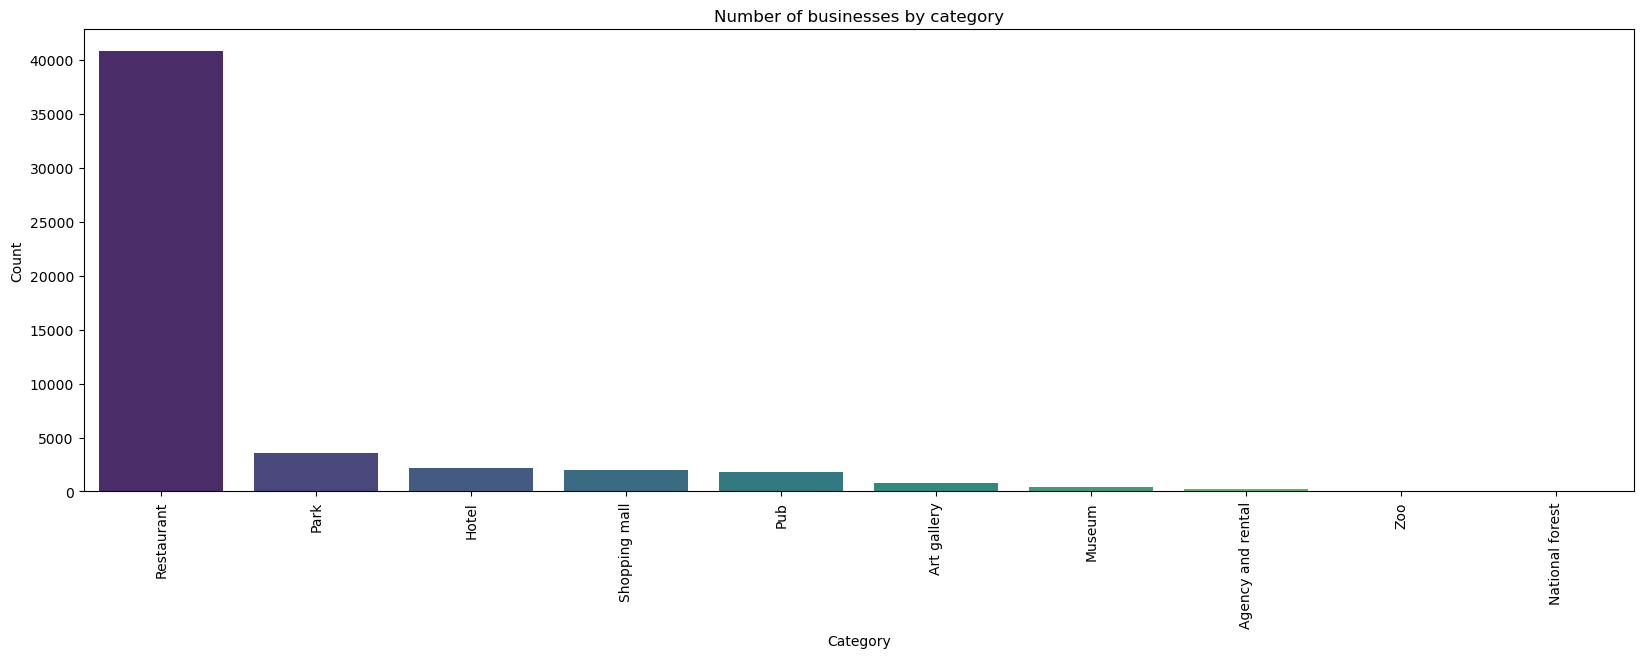

In [17]:
plt.figure(figsize=(20, 6))
sns.barplot(x="Category", y="business_count", data= bus_per_category.sort_values(by='business_count', ascending=False).head(10), palette='viridis')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Number of businesses by category")
plt.xticks(rotation=90)
plt.show()

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 20, Finished, Available)

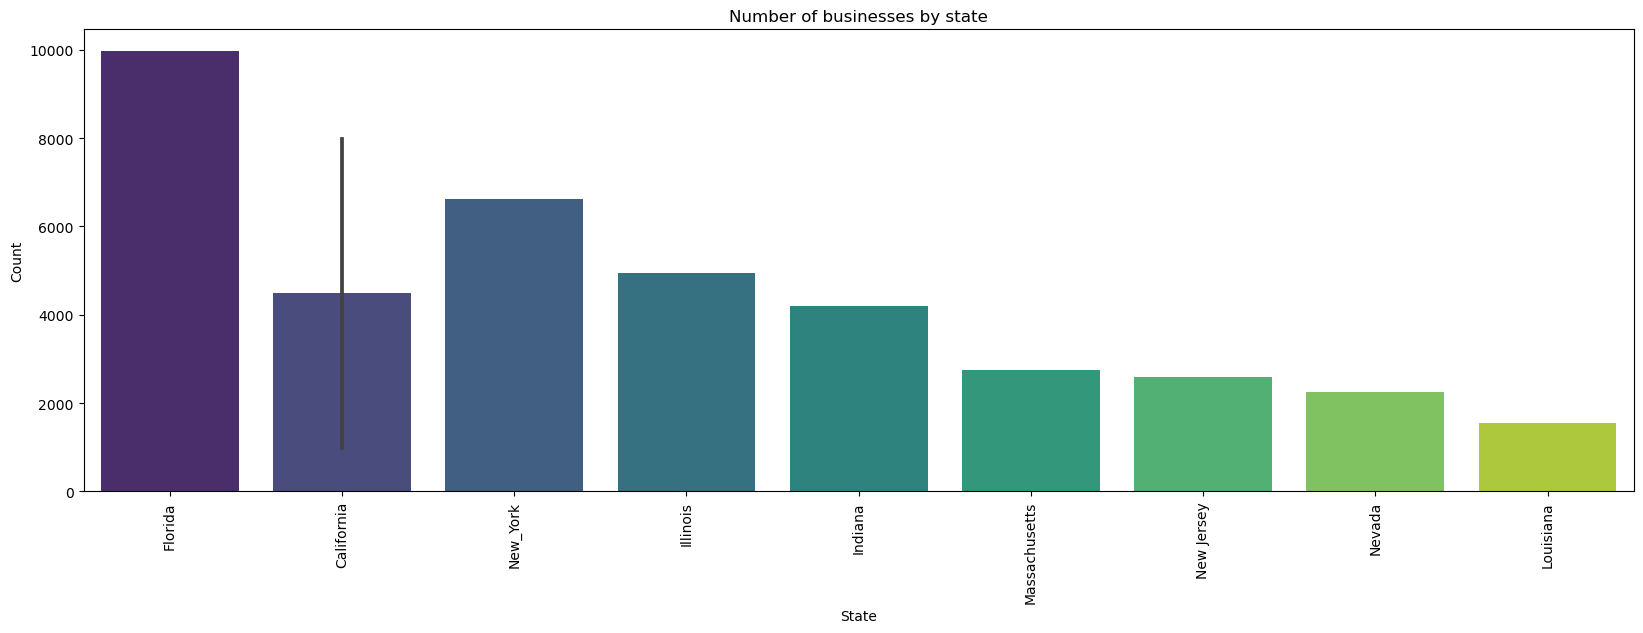

In [18]:
plt.figure(figsize=(20, 6))
sns.barplot(x="State", y="business_count", data= bus_per_category_per_state.sort_values(by='business_count', ascending=False).head(10), palette='viridis')
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Number of businesses by state")
plt.xticks(rotation=90)
plt.show()

##### For a more detailed analysis, we can see the percentage that these categories represent with respect to the total business.

In [19]:
total_negocio = bus_per_category["business_count"].sum()
bus_per_category["porcentaje"] = (bus_per_category["business_count"] / total_negocio)*100
bus_per_category = bus_per_category.sort_values(by="porcentaje", ascending = False)
top_categories = bus_per_category.head(10)
print(top_categories)

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 21, Finished, Available)

             Category  business_count  porcentaje
8          Restaurant           40774   78.644447
6                Park            3567    6.879991
3               Hotel            2191    4.225977
9       Shopping mall            1961    3.782355
7                 Pub            1772    3.417814
1         Art gallery             786    1.516028
4              Museum             418    0.806234
0   Agency and rental             275    0.530417
10                Zoo              54    0.104155
5     National forest              27    0.052077


##### We can also see the number of reviews that the database contains by category, in addition to the number of businesses.

In [20]:
rev_per_category = df_explode.groupby("Category")["Text"].count().reset_index()
rev_per_category = rev_per_category.rename(columns={"Text": "reviews_count"})
bus_per_category = bus_per_category[["Category", "business_count"]]

detail_per_categories = pd.merge(bus_per_category, rev_per_category, on="Category", how="outer")
print(detail_per_categories)


StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 22, Finished, Available)

             Category  business_count  reviews_count
0          Restaurant           40774        5781648
1                Park            3567         201010
2               Hotel            2191         267262
3       Shopping mall            1961         358924
4                 Pub            1772         240933
5         Art gallery             786          19046
6              Museum             418          45669
7   Agency and rental             275          23656
8                 Zoo              54          29041
9     National forest              27           4310
10             Hostel              21            703


##### Where we can see that the first 5 categories in question contain approximately 90% of the number of businesses that had a review, added to the fact that they have the largest number of reviews registered, indicating that we have the greatest amount of information available. the decision-making time for the investor.

- ### Analysis by city

In [21]:
total_city = len(df_explode["City"].unique())
print(f"Total city: {total_city}")

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 23, Finished, Available)

Total city: 3704


##### As we have a large number of cities, first we are going to obtain a dataframe with the number of businesses by city and only analyze the TOP 100

In [22]:
bus_per_city = df_explode.groupby("City")["Business_Name"].nunique().reset_index()
bus_per_city = bus_per_city.rename(columns={"Business_Name": "business_count"})
bus_per_city = bus_per_city.sort_values(by="business_count", ascending = False)
bus_per_city = bus_per_city.head(100)

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 24, Finished, Available)

In [23]:
bus_per_city.sort_values(by='business_count',ascending=False).head(5)

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 25, Finished, Available)

,City,business_count
3214,Tampa,3006
1465,Indianapolis,2732
2226,New York,2105
556,Chicago,1695
2710,Reno,1404


##### Next, we carry out a visualization of the number of reviews by city.

In [24]:
rev_per_city = df_explode.groupby("City")["Text"].count().reset_index()
rev_per_city = rev_per_city.rename(columns={"Text": "reviews_count"})
rev_per_city = rev_per_city.sort_values(by="reviews_count", ascending = False)
rev_per_city = rev_per_city.head(100)

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 26, Finished, Available)

##### And we unify the aforementioned information.

In [25]:
detail_per_city = pd.merge(bus_per_city, rev_per_city, on="City")
detail_per_city = detail_per_city.head(25)
detail_per_city

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 27, Finished, Available)

,City,business_count,reviews_count
0,Tampa,3006,545099
1,Indianapolis,2732,525499
2,New York,2105,164081
3,Chicago,1695,160904
4,Reno,1404,368262
5,Los Angeles,1203,92877
6,Santa Barbara,978,284771
7,Clearwater,797,115295
8,Las Vegas,786,96302
9,Saint Petersburg,527,87811


In [26]:
# Count the number of businesses per city
bus_per_city = df_explode.groupby("City")["Business_Name"].nunique().reset_index()
bus_per_city = bus_per_city.rename(columns={"Business_Name": "business_count"})
bus_per_city = bus_per_city.sort_values(by="business_count", ascending=False)
top_10_cities = bus_per_city[:10]

# Count the number of businesses per state
bus_per_state = df_explode.groupby("State")["Business_Name"].nunique().reset_index()
bus_per_state = bus_per_state.rename(columns={"Business_Name": "business_count"})
bus_per_state = bus_per_state.sort_values(by="business_count", ascending=False)
top_10_states = bus_per_state[:10]

# Print the results
print('Negocios por estado:', top_10_states)
print('Negocios por ciudad:', top_10_cities)

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 28, Finished, Available)

Negocios por estado:                   State  business_count
2               Florida           12623
0            California           10209
9              New_York            7594
3              Illinois            5907
4               Indiana            5372
6         Massachusetts            3214
8            New Jersey            2869
7                Nevada            2864
5             Louisiana            1966
1  District_of_Columbia             437
Negocios por ciudad:                   City  business_count
3214             Tampa            3006
1465      Indianapolis            2732
2226          New York            2105
556            Chicago            1695
2710              Reno            1404
1799       Los Angeles            1203
2889     Santa Barbara             978
596         Clearwater             797
1699         Las Vegas             786
2839  Saint Petersburg             527


StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 29, Finished, Available)

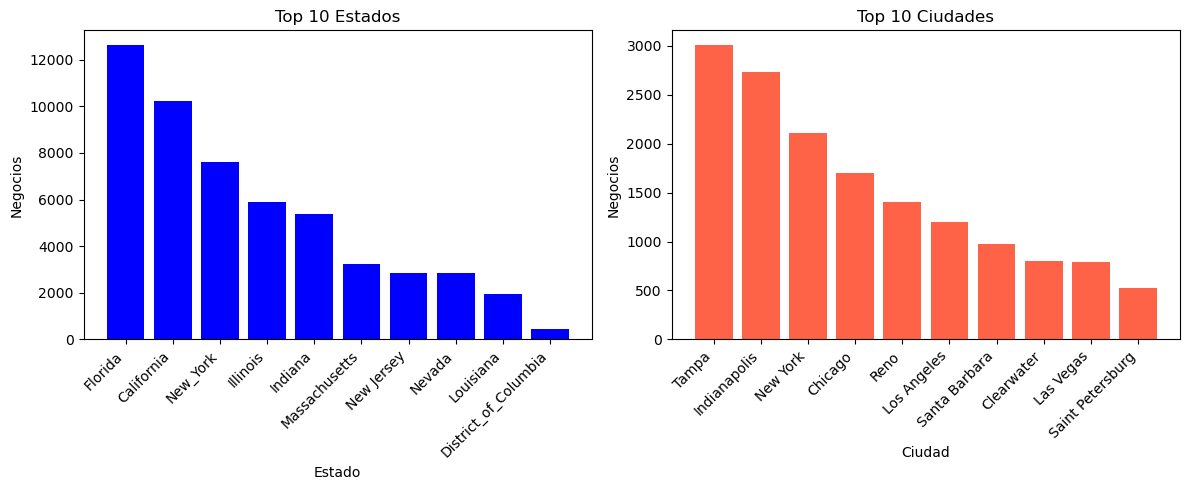

In [27]:
# Define the size of the figure
plt.figure(figsize=(12, 5))

# Plot the top 10 states with the most businesses
plt.subplot(1, 2, 1)
plt.bar(top_10_states["State"], top_10_states["business_count"], color='blue')
plt.xlabel('Estado')
plt.ylabel('Negocios')
plt.title('Top 10 Estados')
plt.xticks(rotation=45, ha='right')  

# Plot the top 10 cities with the most businesses
plt.subplot(1, 2, 2)
plt.bar(top_10_cities["City"], top_10_cities["business_count"], color='tomato')
plt.xlabel('Ciudad')
plt.ylabel('Negocios')
plt.title('Top 10 Ciudades')
plt.xticks(rotation=45, ha='right') 

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

##### Observations:
- ##### We can see that the TOP 10 cities contain the largest number of businesses that had a review.
- ##### That same TOP 10 of cities also contains the largest number of reviews, indicating that these cities are places with a lot of recurrence.
- ##### Those cities that have a large number of reviews and a small number of businesses are a sign that they contain potential businesses with a lot of recurrence; the same applies in reverse.


##### We define the relationship Number of businesses / Number of reviews, by city, as a contribution to help us visualize a priori cities with potential businesses.

In [28]:
detail_per_city["B/R"] = (detail_per_city["business_count"] / detail_per_city["reviews_count"])
detail_per_city = detail_per_city.sort_values(by="B/R", ascending = True)
sorted_df = detail_per_city.sort_values(by='reviews_count',ascending=False)
sorted_df

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 30, Finished, Available)

,City,business_count,reviews_count,B/R
0,Tampa,3006,545099,0.005515
1,Indianapolis,2732,525499,0.005199
4,Reno,1404,368262,0.003813
6,Santa Barbara,978,284771,0.003434
2,New York,2105,164081,0.012829
3,Chicago,1695,160904,0.010534
7,Clearwater,797,115295,0.006913
10,St. Petersburg,504,97035,0.005194
8,Las Vegas,786,96302,0.008162
5,Los Angeles,1203,92877,0.012953


In [29]:
# Filter the DataFrame by each category and count the number of businesses in each state
categories = ['Museum', "Shopping mall", 'Roller coaster', 'National forest', 'Art gallery', 'Zoo']
category_counts = {}
		
for category in categories:
    filtered_df = df_explode[df_explode['Category'] == category]
    category_counts[category] = filtered_df.groupby('State').size()

category_counts

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 31, Finished, Available)

{'Museum': State
 California               4694
 District_of_Columbia       72
 Florida                 11190
 Illinois                 5843
 Indiana                  7755
 Louisiana                 380
 Massachusetts            3820
 Nevada                   1636
 New Jersey               2481
 New_York                 7798
 dtype: int64,
 'Shopping mall': State
 California               96669
 District_of_Columbia      1456
 Florida                 109388
 Illinois                 25623
 Indiana                  32799
 Louisiana                 8629
 Massachusetts            14433
 Nevada                   29060
 New Jersey                1806
 New_York                 39061
 dtype: int64,
 'Roller coaster': Series([], dtype: int64),
 'National forest': State
 California       3243
 Florida           760
 Illinois           78
 Indiana            36
 Louisiana          39
 Massachusetts      76
 Nevada             40
 New_York           38
 dtype: int64,
 'Art gallery': State
 Califo

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 32, Finished, Available)

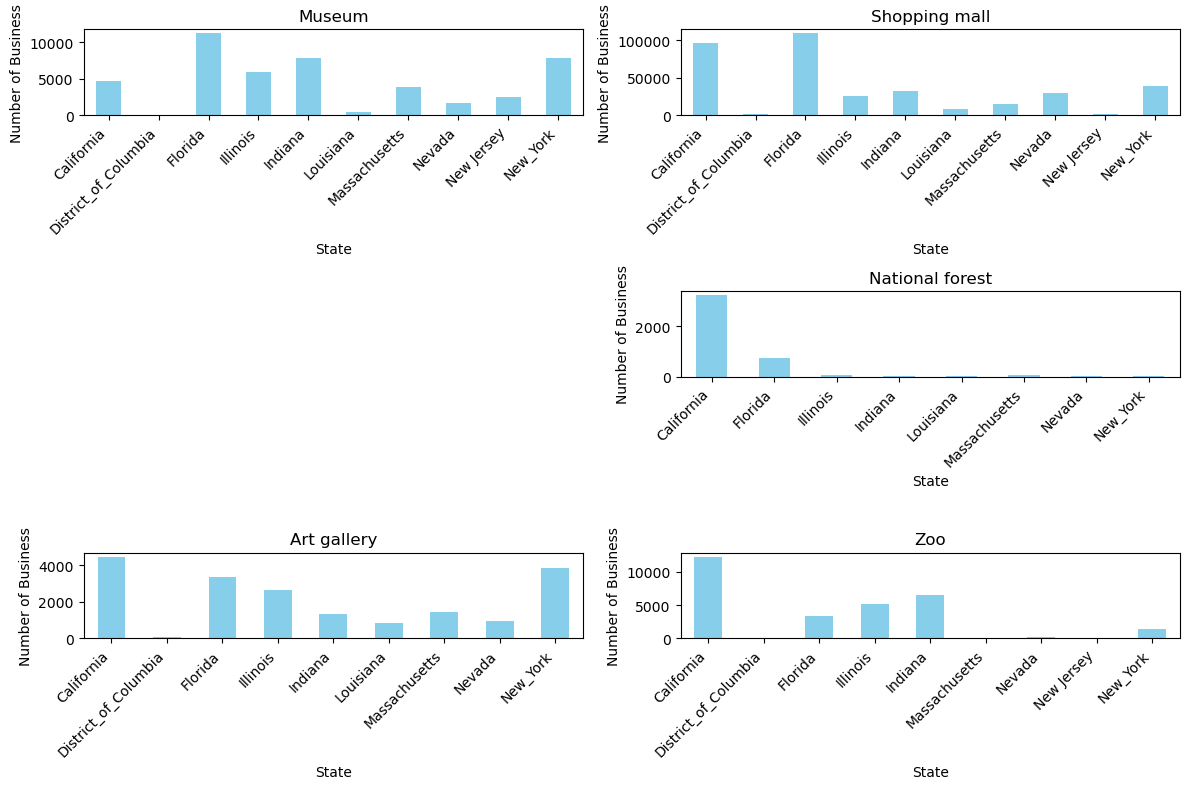

In [30]:
plt.figure(figsize=(12, 8))
for i, (category, counts) in enumerate(category_counts.items(), start=1):
    if not counts.empty:  # Check if counts is not empty before plotting
        plt.subplot(3, 2, i)
        counts.plot(kind='bar', color='skyblue')
        plt.title(category)
    plt.xlabel('State')
    plt.ylabel('Number of Business')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## TREATMENT OF NUMERICAL VARIABLES

##### Statistical summary

In [31]:
df_explode.head()

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 33, Finished, Available)

,Business_Id,Business_Name,Address,City,State,Latitude,Longitude,Ranking,Review_Count,Date,Checkin_Count,User_Id,Stars,Text,User_Name,Category
0,1,Vietnamese Food Truck,,Tampa Bay,Florida,27.955269,-82.456320,4.0,10,2019-04-04 16:03:00,4,nnu9h6du4E6oqMasPgKR3Q,5,I eat pho about 4 times a week and from a spec...,Dana,Restaurant
1,2,Thai 5 Fast Food,3424 S Dale Mabry Hwy,Tampa,Florida,27.912060,-82.505768,4.0,336,2018-02-04 18:25:53,495,nnu9h6du4E6oqMasPgKR3Q,1,Had gotten the Pad see eew in the past and did...,Dana,Restaurant
2,3,Thai Gourmet Market,5831 Memorial Hwy,Tampa,Florida,27.984573,-82.568798,4.5,194,2016-06-11 23:14:50,499,nnu9h6du4E6oqMasPgKR3Q,5,"BEST PAD Thai I have ever had!! Seriously, not...",Dana,Restaurant
3,1,Vietnamese Food Truck,,Tampa Bay,Florida,27.955269,-82.456320,4.0,10,2018-10-23 00:36:29,4,JlEdjZvhAbFCU-ObZQb1lw,5,I've been in Wesley Chapel area for about 2 ye...,Linh,Restaurant
4,4,Brunchies - Lutz,24400 State Rd 54,Lutz,Florida,28.185389,-82.413001,4.0,272,2018-01-13 20:08:35,298,JlEdjZvhAbFCU-ObZQb1lw,5,My experience was wonderful. My server Michea...,Linh,Restaurant


In [32]:
df_explode.describe()

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 34, Finished, Available)

,Business_Id,Latitude,Longitude,Ranking,Review_Count,Checkin_Count,Stars
count,6.972202e+06,6.972202e+06,6.972202e+06,6.972202e+06,6.972202e+06,6.972202e+06,6.972202e+06
mean,3.408131e+04,3.504718e+01,-9.177476e+01,4.019695e+00,8.728166e+02,3.630703e+02,4.049788e+00
std,2.513051e+04,5.744707e+00,1.689602e+01,5.689955e-01,1.454699e+03,1.468565e+03,1.251362e+00
min,1.000000e+00,2.454741e+01,-1.242194e+02,1.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00
25%,7.417000e+03,2.809211e+01,-1.151748e+02,3.800000e+00,1.020000e+02,1.000000e+00,4.000000e+00
50%,3.356000e+04,3.617079e+01,-8.564164e+01,4.100000e+00,3.140000e+02,1.000000e+00,5.000000e+00
75%,5.987300e+04,3.991307e+01,-8.168544e+01,4.500000e+00,1.038000e+03,2.370000e+02,5.000000e+00
max,6.840100e+04,4.499223e+01,-6.994921e+01,5.000000e+00,9.998000e+03,3.751800e+04,5.000000e+00


##### Distribution of numerical variables

##### We will graph Histograms to visualize and understand the distribution of numerical data.

In [33]:
numeric_var = df_explode[["Latitude", "Longitude", "Ranking", "Review_Count", "Checkin_Count", "Stars"]]

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 35, Finished, Available)

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 36, Finished, Available)

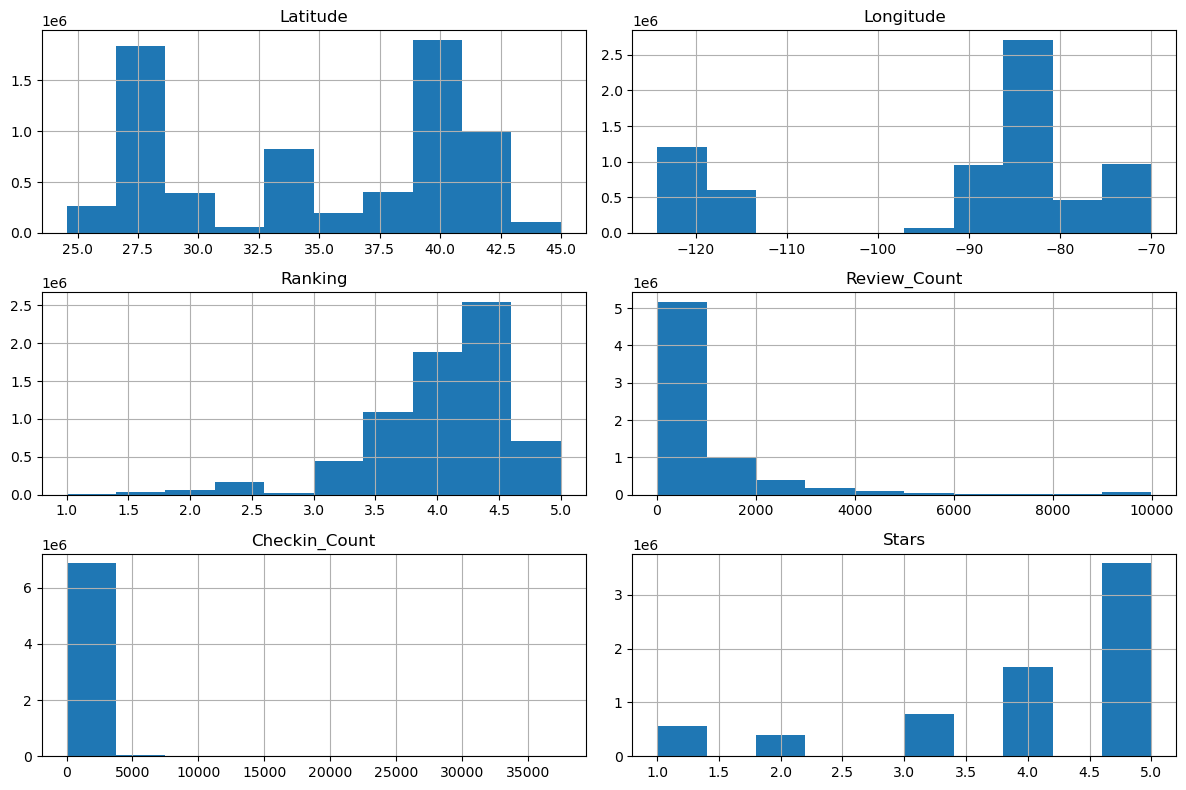

In [34]:
numeric_var.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

##### Visual ANALYSIS of information:

- ##### Regarding latitude we can see a very marked area between 28 and 40 where the largest number of businesses are located; With respect to length, the marked area is between -120/-110 and -90/-80.
- ##### The business score ("stars_x") provided by the sites is mostly between 3.5 and 4.5.
- ##### Most businesses have between 100 and 600 reviews contributed by users.
- ##### The rating provided by users ("stars_y") is more critical to observe; It varies between 2.0 to 5.0, which becomes relevant when choosing the business by the investor.

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 37, Finished, Available)

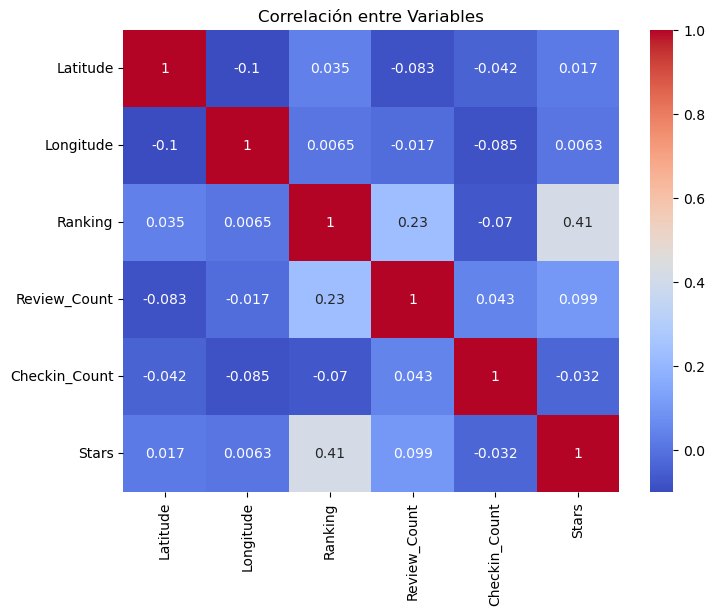

In [35]:
## Heat graph
selected_df = df_explode[["Latitude", "Longitude", "Ranking", "Review_Count", "Checkin_Count", "Stars"]]

correlation_matrix = selected_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables')
plt.show()

##### In the correlation diagram we can see that there is no relationship between the variables, except for the reviews/checkin relationship and x/y score, which we already know are in agreement.

## TREATMENT OF NUMERICAL AND CATEGORICAL VARIABLES

##### It is important for us to add to the treatment of categorical variables, information on the business scores provided by the Yelp site ("Ranking") and those provided by users ("Stars"); For them we will propose to group said data by determining their average.

In [36]:
df_explode.head()

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 38, Finished, Available)

,Business_Id,Business_Name,Address,City,State,Latitude,Longitude,Ranking,Review_Count,Date,Checkin_Count,User_Id,Stars,Text,User_Name,Category
0,1,Vietnamese Food Truck,,Tampa Bay,Florida,27.955269,-82.456320,4.0,10,2019-04-04 16:03:00,4,nnu9h6du4E6oqMasPgKR3Q,5,I eat pho about 4 times a week and from a spec...,Dana,Restaurant
1,2,Thai 5 Fast Food,3424 S Dale Mabry Hwy,Tampa,Florida,27.912060,-82.505768,4.0,336,2018-02-04 18:25:53,495,nnu9h6du4E6oqMasPgKR3Q,1,Had gotten the Pad see eew in the past and did...,Dana,Restaurant
2,3,Thai Gourmet Market,5831 Memorial Hwy,Tampa,Florida,27.984573,-82.568798,4.5,194,2016-06-11 23:14:50,499,nnu9h6du4E6oqMasPgKR3Q,5,"BEST PAD Thai I have ever had!! Seriously, not...",Dana,Restaurant
3,1,Vietnamese Food Truck,,Tampa Bay,Florida,27.955269,-82.456320,4.0,10,2018-10-23 00:36:29,4,JlEdjZvhAbFCU-ObZQb1lw,5,I've been in Wesley Chapel area for about 2 ye...,Linh,Restaurant
4,4,Brunchies - Lutz,24400 State Rd 54,Lutz,Florida,28.185389,-82.413001,4.0,272,2018-01-13 20:08:35,298,JlEdjZvhAbFCU-ObZQb1lw,5,My experience was wonderful. My server Michea...,Linh,Restaurant


In [37]:
## We calculate the average of both grades
df_explode["avg_punt"] = (df_explode["Ranking"] + df_explode["Stars"]) / 2

df_nc = df_explode.groupby(["Business_Name", "Address", "City", "State", "Latitude", "Longitude", "Category"]).agg({"Checkin_Count": "mean", "Review_Count": "mean", "avg_punt": "mean"}).reset_index()
df_nc = df_nc.drop_duplicates()

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 39, Finished, Available)

In [38]:
df_nc.head()

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 40, Finished, Available)

,Business_Name,Address,City,State,Latitude,Longitude,Category,Checkin_Count,Review_Count,avg_punt
0,"""BLUE ZEBRA"" LA ZEBRA AZUL RESTAURANT BAR, NIG...","""BLUE ZEBRA"" LA ZEBRA AZUL RESTAURANT BAR, NIG...",Lodi,California,38.122706,-121.260056,Restaurant,1.0,33.0,4.177778
1,"""Genuino"" Italian Cafe'",14351 N Dale Mabry Hwy,Tampa,Florida,28.077936,-82.506174,Restaurant,34.0,60.0,4.400685
2,"""SAVE ME SOME""","""SAVE ME SOME"", 819 E 142nd St, Dolton, IL 60419",Dolton,Illinois,41.636799,-87.596785,Restaurant,1.0,115.0,4.148039
3,"""TACOS"" MICHOACAN","""TACOS"" MICHOACAN, 18300 Vanowen St Ste 2, Res...",Los Angeles,California,34.193687,-118.531962,Restaurant,1.0,88.0,4.177273
4,"""ZITRO"", seafood & grill","""ZITRO"", seafood & grill, 11840 Foothill Blvd,...",Los Angeles,California,34.273246,-118.394763,Restaurant,1.0,35.0,4.537500


- ### Analysis by city

In [39]:
## We group by city and count the number of unique businesses
bus_per_city = df_nc.groupby("City")["Business_Name"].nunique().reset_index()
bus_per_city = bus_per_city.rename(columns={"Business_Name": "business_count"})
bus_per_city = bus_per_city.sort_values(by="business_count", ascending = False)

## We group by city and count the number of reviews
rev_per_city = df_nc.groupby("City")["Review_Count"].sum().reset_index()
rev_per_city = rev_per_city.sort_values(by="Review_Count", ascending = False)

## We group by city and calculate the average rating
avg_per_city = df_nc.groupby("City")["avg_punt"].mean().reset_index()
avg_per_city = avg_per_city.sort_values(by="avg_punt", ascending = False)

## We group by city and add the amount of checkin
checkin_per_city = df_nc.groupby("City")["Checkin_Count"].sum().reset_index()
checkin_per_city = checkin_per_city.sort_values(by="Checkin_Count", ascending = False)

## We unify the information and present the TOP 25
detail_per_city = pd.merge(bus_per_city, rev_per_city, on="City")
detail_per_city = pd.merge(detail_per_city, avg_per_city, on="City")
detail_per_city = pd.merge(detail_per_city, checkin_per_city, on="City")
detail_per_city[detail_per_city['Review_Count']>200000].sort_values(by='avg_punt',ascending=False)

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 41, Finished, Available)

,City,business_count,Review_Count,avg_punt,Checkin_Count
8,Las Vegas,786,204409.000000,4.213604,903.000000
3,Chicago,1695,293416.304348,4.200981,1942.000000
2,New York,2105,323371.000000,4.171666,2365.000000
6,Santa Barbara,978,207363.042999,3.850556,406201.187329
0,Tampa,3006,411000.174603,3.588035,785823.301587
1,Indianapolis,2732,435827.000000,3.574309,708131.000000
4,Reno,1404,257206.000000,3.567983,544004.000000


##### We note that the calculated average of the scores grouped by city does not present much variation. If there is a direct relationship between the number of reviews provided by users with the number of check-ins registered in said businesses.
##### We propose the following relationship between the variables, to be able to visualize a priori those cities with business potential; A high value represents greater potential or attractiveness for said city.
##### 
- ##### rel_per_city = (reviews_count x count_checkin x avg_punt) / (business_count * 10000)

In [40]:
detail_per_city ["rel_per_city"] = ( detail_per_city["Review_Count"]*detail_per_city["Checkin_Count"]*detail_per_city["avg_punt"] / (detail_per_city["business_count"]*100000))
detail_per_city = detail_per_city.sort_values(by="rel_per_city", ascending = False)
detail_per_city.head(10)

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 42, Finished, Available)

,City,business_count,Review_Count,avg_punt,Checkin_Count,rel_per_city
1,Indianapolis,2732,435827.000000,3.574309,708131.000000,4037.747311
0,Tampa,3006,411000.174603,3.588035,785823.301587,3855.091259
4,Reno,1404,257206.000000,3.567983,544004.000000,3555.812212
6,Santa Barbara,978,207363.042999,3.850556,406201.187329,3316.325608
10,St. Petersburg,504,93692.000000,3.791172,81640.000000,575.371582
7,Clearwater,797,106013.000000,3.630051,110828.000000,535.134640
9,Saint Petersburg,527,60973.000000,3.655312,110904.000000,469.027810
16,Sparks,381,51470.000000,3.503041,90925.000000,430.286460
25,Goleta,244,29535.000000,3.570011,73489.000000,317.569726
19,Brandon,330,47532.000000,3.524229,57809.000000,293.448420


In [41]:
detail_per_city.tail(10)

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 43, Finished, Available)

,City,business_count,Review_Count,avg_punt,Checkin_Count,rel_per_city
3142,Douglas City,1,18.0,2.609091,1.0,0.000470
3694,Bellville,1,6.0,1.583333,4.0,0.000380
3639,Selkirk,1,14.0,2.631818,1.0,0.000368
2754,Tren,1,10.0,3.178571,1.0,0.000318
2997,Westmont - Haddon Towsship,1,10.0,2.875000,1.0,0.000287
3511,St Petersberg,1,5.0,4.916667,1.0,0.000246
2884,Temple Terr,1,7.0,3.464286,1.0,0.000243
3195,Quinton,1,7.0,3.156250,1.0,0.000221
2949,Washoe,1,6.0,1.916667,1.0,0.000115
2996,Westhampton,1,5.0,1.900000,1.0,0.000095


##### With the proposed formula we can see that even though a city has a high average rating, the index may be low due to not having enough check-ins in businesses and therefore a low number of reviews; Having a high index and low number of commented businesses gives us information that in said city the businesses are of high attendance and good quality, or that there are other tourist attractions for which users come.

- ### Analysis by category

In [42]:
## We group by category and count the number of unique businesses
bus_per_category = df_nc.groupby("Category")["Business_Name"].nunique().reset_index()
bus_per_category = bus_per_category.rename(columns={"Business_Name": "business_count"})
bus_per_category = bus_per_category.sort_values(by="business_count", ascending = False)

## We group by category and count the number of reviews
rev_per_category = df_nc.groupby("Category")["Review_Count"].sum().reset_index()
rev_per_category = rev_per_category.sort_values(by="Review_Count", ascending = False)

## We group by category and calculate the average score
avg_per_category = df_nc.groupby("Category")["avg_punt"].mean().reset_index()
avg_per_category = avg_per_category.sort_values(by="avg_punt", ascending = False)

## We group by category and add the amount of checkin
checkin_per_category = df_nc.groupby("Category")["Checkin_Count"].sum().reset_index()
checkin_per_category = checkin_per_category.sort_values(by="Checkin_Count", ascending = False)

## We unify the information and present the TOP 25
detail_per_category = pd.merge(bus_per_category, rev_per_category, on="Category")
detail_per_category = pd.merge(detail_per_category, avg_per_category, on="Category")
detail_per_category = pd.merge(detail_per_category, checkin_per_category, on="Category")
detail_per_category

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 44, Finished, Available)

,Category,business_count,Review_Count,avg_punt,Checkin_Count
0,Restaurant,40774,7.519974e+06,3.981796,3.296055e+06
1,Park,3567,3.022210e+05,4.055416,1.305560e+05
2,Hotel,2191,1.492902e+05,3.271150,3.049593e+05
3,Shopping mall,1961,4.755520e+05,4.273119,4.837600e+04
4,Pub,1772,2.383760e+05,3.795628,3.246720e+05
5,Art gallery,786,3.630400e+04,4.651488,7.920000e+02
6,Museum,418,6.437700e+04,4.492157,2.833600e+04
7,Agency and rental,275,1.685800e+04,3.178275,3.253700e+04
8,Zoo,54,4.731400e+04,4.410787,8.144000e+03
9,National forest,27,6.480000e+03,4.645608,2.700000e+01


##### We apply the same formula used previously.

In [43]:
detail_per_category ["rel_per_category"] = ( detail_per_category["Review_Count"]*detail_per_category["Checkin_Count"]*detail_per_category["avg_punt"] / (detail_per_category["business_count"]*100000))
detail_per_category = detail_per_category.sort_values(by="rel_per_category", ascending = False)
detail_per_category

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 45, Finished, Available)

,Category,business_count,Review_Count,avg_punt,Checkin_Count,rel_per_category
0,Restaurant,40774,7.519974e+06,3.981796,3.296055e+06,24205.078140
4,Pub,1772,2.383760e+05,3.795628,3.246720e+05,1657.781386
2,Hotel,2191,1.492902e+05,3.271150,3.049593e+05,679.721838
3,Shopping mall,1961,4.755520e+05,4.273119,4.837600e+04,501.297281
1,Park,3567,3.022210e+05,4.055416,1.305560e+05,448.594341
8,Zoo,54,4.731400e+04,4.410787,8.144000e+03,314.738384
6,Museum,418,6.437700e+04,4.492157,2.833600e+04,196.041443
7,Agency and rental,275,1.685800e+04,3.178275,3.253700e+04,63.393150
5,Art gallery,786,3.630400e+04,4.651488,7.920000e+02,1.701567
10,Hostel,21,1.175000e+03,3.653566,6.150000e+02,1.257218


##### We can see that the "Pubs" category is in second position because it has a large number of check-ins and reviews, and a low number of businesses, giving us an indication that they are companies that provide good service and have a lot of attendance, presenting themselves as a potential opportunity. of business.

In [44]:
df_explode['Date'] = pd.to_datetime(df_explode['Date'])
df_explode['User_Id'] = df_explode['User_Id'].astype(str).str.encode('utf-8')

## We save the summarized dataframe of the grouped information
df_nc.to_parquet('/lakehouse/default/Files/df_database/files_to_EDA/resume_data.parquet')

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 46, Finished, Available)

In [45]:
## We save the detailed dataframe with the comments
df_explode.to_parquet('/lakehouse/default/Files/df_database/files_to_EDA/total_data.parquet')

StatementMeta(, c256cc4f-697d-47e6-a08b-183e2ef78560, 47, Finished, Available)